<a href="https://colab.research.google.com/github/Phrmth/New/blob/master/Neural_Net_on_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import tensor
from torch import nn
import torch.nn.functional as F
import torch
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [0]:

if torch.cuda.is_available():
 device = torch.device("cuda")
else : device = torch.device("cpu")

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [9]:
# Data
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


tensor(9)


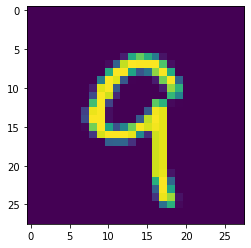

In [19]:
xb, yb = next(iter(train_loader))
plt.imshow(xb[5].view(28,28))
print(yb[5])

In [0]:
class NN(nn.Module):
  def __init__(self, input_size, hidden_size, output): 
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output = output
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    
    return out

In [0]:
model = NN(input_size, hidden_size, num_classes)

In [22]:
model

NN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
# Model fit - Train and validation scores per epoch !
train_loss = []
valid_loss = []
def fit(epochs, model , train_loader, test_loader, opt, loss_func ):

  model.to(device)
  for epoch in range(epochs):
    
    for i,(xb, yb) in enumerate(train_loader):

      model.train()
      opt.zero_grad()
      xb,yb = xb.reshape(-1, 28*28).to(device),yb.to(device)

      pred = model(xb)
      loss = loss_func(pred,yb)
      loss.backward()
      opt.step()

    train_loss.append(loss)
      # with torch.no_grad():
      #   for p in model.parameters(): p-= p.grad * lr

    with torch.no_grad():
      for xv,yv in test_loader:
        
        xv,yv = xv.reshape(-1, 28*28).to(device),yv.to(device)
        pred = model(xv)
        loss_v = loss_func(pred,yv)

      valid_loss.append(loss_v)

    
    if (epoch+1) % 1 == 0: 
      print(f"Epoch{epoch} : Train Loss {loss.item()} , Valid Loss {loss_v.item()}")
  
  return train_loss, valid_loss


In [35]:
# Training and Validation Loss 
%time loss = fit(5, model, train_loader, test_loader, opt, loss_fn)

Epoch0 : Train Loss 0.0019457006128504872 , Valid Loss 0.011874765157699585
Epoch1 : Train Loss 0.00326165440492332 , Valid Loss 0.008793303743004799
Epoch2 : Train Loss 0.0018962883623316884 , Valid Loss 0.010429677553474903
Epoch3 : Train Loss 0.000844738504383713 , Valid Loss 0.010002752766013145
Epoch4 : Train Loss 0.0004760956799145788 , Valid Loss 0.02244311012327671
CPU times: user 42.9 s, sys: 381 ms, total: 43.3 s
Wall time: 43.4 s


In [53]:
# Final testing on validation data of 10000 samples. 
with torch.no_grad():
  correct = 0
  total = 0
  model = model.to(device)
  print(model)
  for xv,yv in test_loader:
    xv,yv = xv.reshape(-1, 28*28).to(device),yv.to(device)
    pred = model(xv)
    # print(pred)
    # _, predicted = torch.max(pred.data, 1)
    total += yv.size(0)
    # print("correct per batch",(torch.argmax(pred,dim = 1) == yv).sum())
    correct += (torch.argmax(pred,dim = 1) == yv).sum()
    torch.argmax
    print(f"Accuracy per batch is {((torch.argmax(pred,dim = 1) == yv).sum().item())/yv.size(0)}")
  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


NN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Accuracy per batch is 1.0
Accuracy per batch is 0.97
Accuracy per batch is 0.99
Accuracy per batch is 0.97
Accuracy per batch is 0.98
Accuracy per batch is 0.99
Accuracy per batch is 0.97
Accuracy per batch is 0.99
Accuracy per batch is 1.0
Accuracy per batch is 0.95
Accuracy per batch is 0.97
Accuracy per batch is 0.98
Accuracy per batch is 0.95
Accuracy per batch is 0.96
Accuracy per batch is 0.98
Accuracy per batch is 0.98
Accuracy per batch is 0.97
Accuracy per batch is 0.99
Accuracy per batch is 1.0
Accuracy per batch is 0.97
Accuracy per batch is 0.95
Accuracy per batch is 0.95
Accuracy per batch is 0.98
Accuracy per batch is 0.98
Accuracy per batch is 0.95
Accuracy per batch is 0.99
Accuracy per batch is 0.97
Accuracy per batch is 1.0
Accuracy per batch is 0.96
Accuracy per batch is 0.97
Accuracy per batch is 0.97
Accuracy per batch is